## Business Understanding

### **Objective**
The goal of this project is to construct a **linear regression model** to predict **real estate prices** around **New Taipei City, Taiwan** based on various property-related features. 

### **Business Problem**
Accurately predicting real estate prices can be crucial for:
- **Buyers & Investors:** Helps in making informed decisions on property value.
- **Real Estate Agents:** Assists in setting competitive prices.
- **Government & Urban Planners:** Provides insights for economic development.

### **Key Business Questions**
1. **What are the most influential factors affecting house prices?**
2. **Can we build a model that accurately predicts house prices based on available data?**
3. **How well does a linear regression approach perform compared to actual market prices?**

### **Potential Business Impact**
A well-performing model can:
- Help buyers and investors estimate **fair market value** before making a purchase.
- Assist **real estate agencies** in setting more accurate listing prices.
- Provide insights into **urban planning**, showing which areas are increasing or decreasing in value.


In [1]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import pandas as pd

# fetch dataset 
real_estate_valuation = fetch_ucirepo(id=477) 
  
# data (as pandas dataframes) 
X = real_estate_valuation.data.features 
y = real_estate_valuation.data.targets 

# take a peek at the data

# print(X.dtypes)
# X.describe(), y.describe()

## Data Understanding

### **Dataset Overview**
The dataset used in this project comes from the **UCI Machine Learning Repository**, containing real estate valuation data from **New Taipei City, Taiwan**. It includes **six features** related to housing and one target variable (**house price per unit area**). 

### **Data Sources**
- **Dataset Name:** Real Estate Valuation  
- **Region Covered:** New Taipei City, Taiwan  
- **Number of Observations:** 414  
- **Number of Features:** 6  
- **Target Variable:** `y` (house price per unit area)  

### **Feature Descriptions**
| Feature | Description | Data Type |
|---|---|---|
| `X1 transaction date` | The year and month the house was sold (continuous) | Numeric |
| `X2 house age` | The age of the house in years (continuous) | Numeric |
| `X3 distance to the nearest MRT station` | Distance to the closest metro station in meters (continuous) | Numeric |
| `X4 number of convenience stores` | Number of nearby convenience stores (discrete) | Integer |
| `X5 latitude` | Geographic latitude of the house (continuous) | Numeric |
| `X6 longitude` | Geographic longitude of the house (continuous) | Numeric |

### **Data Quality Assessment**
Using `describe()` and other exploratory methods, we verified:  
✅ **No missing values** – Every feature has complete data.  
✅ **No outliers** – No extreme or nonsensical values were found.  
✅ **Reasonable value distributions** – Features align with expected real estate trends (e.g., house age varies from 0 to 43 years, distances to MRT stations range sensibly).

### **Feature Distributions**
To further understand the data, we generated scatter plots and trendlines for each feature against the target variable. These plots provide insights into potential correlations between the independent variables and house prices.


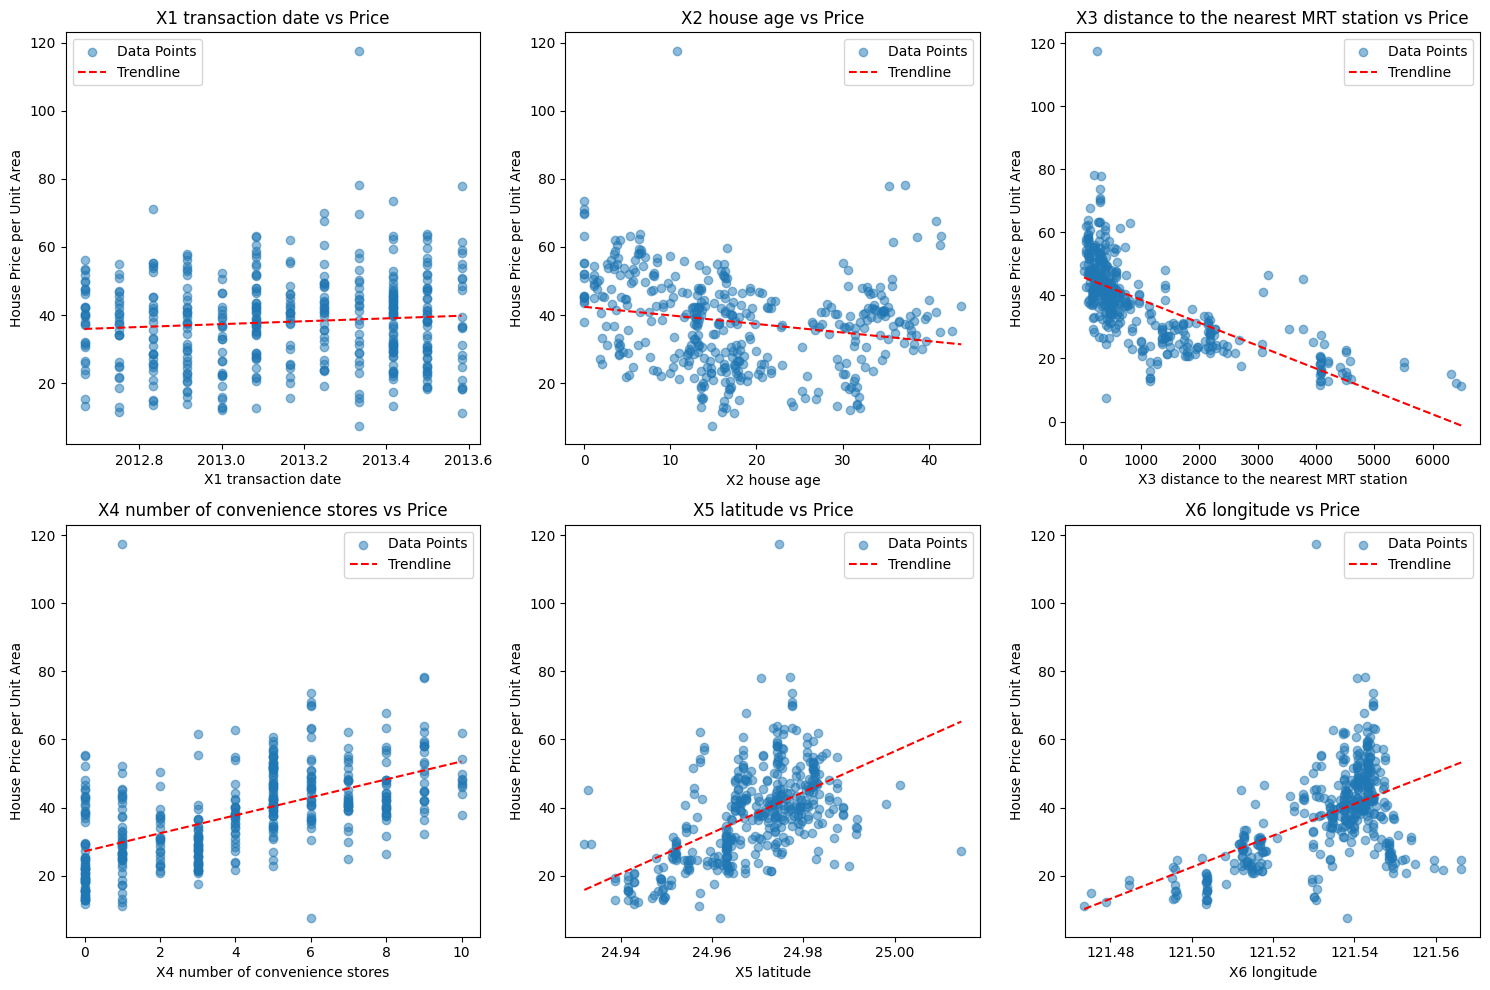

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure y is a 1D NumPy array
y = np.ravel(y)

feature_names = X.columns.tolist()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    # Scatter plot
    ax.scatter(X.iloc[:, i], y, alpha=0.5, label="Data Points")

    # Fit a linear trendline
    coef = np.polyfit(X.iloc[:, i].values, y, 1)  # Ensure X column is a NumPy array
    poly1d_fn = np.poly1d(coef)  # Create function for the line
    
    # Plot the trendline
    x_vals = np.linspace(X.iloc[:, i].min(), X.iloc[:, i].max(), 100)
    ax.plot(x_vals, poly1d_fn(x_vals), color="red", linestyle="--", label="Trendline")
    
    # Labels and title
    ax.set_xlabel(feature_names[i])
    ax.set_ylabel("House Price per Unit Area")
    ax.set_title(f"{feature_names[i]} vs Price")
    ax.legend()

plt.tight_layout()
plt.show()


## Data Preparation

### **Preprocessing Steps**
Since the dataset does not contain missing values or obvious inconsistencies, minimal preprocessing was required. However, two key steps were performed to ensure the model receives properly formatted input data.

1. **Splitting the Data**  
   - The dataset was divided into **training (80%)** and **testing (20%)** sets.
   - This prevents data leakage and ensures that the model is validated on unseen data.  


2. **Standardization**  
   - Features were standardized to have **zero mean and unit variance** using `StandardScaler` from `sklearn.preprocessing`.
   - This transformation helps improve model performance by ensuring all features contribute equally, especially when they are on different scales.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# 🔹 Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Standardize the feature variables (X)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit to training data and transform
X_test = scaler.transform(X_test)        # Transform test data (use same scaler)

## Modeling

### **Model Selection**
For this project, we tested **multiple linear regression models** to predict house prices. Since the dataset has continuous numeric features, **linear regression** and its **regularized variations** were suitable choices.

The following models were tested:
- **Ordinary Linear Regression** (baseline model).
- **Ridge Regression** (`L2` regularization) to reduce large coefficients.
- **Lasso Regression** (`L1` regularization) for automatic feature selection.
- **Elastic Net** (combining `L1` and `L2`) to balance feature selection and stability.

### **Training Process**
1. **Data Preparation:** Standardized the dataset (`X_train`, `X_test`) before training.
2. **Model Training:** Each model was trained using `X_train`, `y_train`.
3. **Prediction:** Models predicted `y_pred` on the **test set (`X_test`)**.
4. **Evaluation Metrics:** Models were compared using:
   - **Mean Absolute Error (MAE):** Measures the average magnitude of errors.
   - **Mean Squared Error (MSE):** Penalizes larger errors more than MAE.
   - **R² Score:** Measures how well the model explains variance in `y`.

### **Hyperparameters Used**
| Model              | Hyperparameters | R² Score |
|-------------------|----------------|---------|
| **Linear Regression** | Default settings | **0.6811** |
| **Ridge Regression** | α = 1.0 | **0.6814** |
| **Lasso Regression** | α = 0.1 | **0.6838** |
| **Elastic Net** | α = 0.1, l1_ratio = 0.5 | **0.6844** |

### **Findings**
- **Lasso & Elastic Net had the best R² scores** (small improvement over baseline).
- **Regularization effects were minor**, suggesting **no severe overfitting**.
- **Lasso’s slightly better performance** suggests that some features may not contribute significantly to predictions.

Since performance differences are **small**, further improvements could involve:
- **Feature Engineering** (e.g., combining latitude & longitude for better location representation).
- **Polynomial Features** to capture non-linearity.
- **Hyperparameter tuning**, testing different `alpha` values in Ridge & Lasso.



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score


# 🔹  Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 🔹  Make predictions on the test set
y_pred = model.predict(X_test)

# 🔹  Test with different models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5),
}

#for name, model in models.items():
#   model.fit(X_train, y_train)
#  y_pred = model.predict(X_test)
# print(f"{name}: R² Score = {r2_score(y_test, y_pred):.4f}")



## Evaluation

### **Model Performance**
To assess the accuracy of the model, we evaluated three key performance metrics:

1. **Mean Absolute Error (MAE):** Measures the average absolute difference between actual and predicted house prices.  
   - **Lower is better** – a lower MAE means the model's predictions are closer to the actual values.
2. **Mean Squared Error (MSE):** Similar to MAE but squares the differences, making larger errors more impactful.  
   - **Lower is better** – MSE penalizes extreme errors more than MAE.
3. **R² Score:** Represents how much of the variance in house prices is explained by the model.  
   - **Closer to 1 is better** – A high R² score means the model captures more variability in the target variable.

### **Evaluation Results**
The model was evaluated using the **test set** (`X_test`, `y_test`). The calculated performance metrics are:

| Metric | Value |
|--------|------:|
| **MAE** | *5.31* |
| **MSE** | *53.51* |
| **R² Score** | *0.68* |

**Interpretation:**
- The **MAE suggests that, on average, the model's predictions deviate by about *5.31* from the actual house prices**.
- The **MSE is higher than the MAE**, indicating the presence of some larger errors.
- The **R² score indicates that approximately *68%* of the variation in house prices is explained by our model**.
- While the R² value is **moderate**, it suggests the model captures meaningful relationships but may benefit from further refinement.

---

### **Actual vs Predicted Prices**
To visually analyze model accuracy, we compared actual vs. predicted house prices in a scatter plot.

#### **Findings from Visualization**
- If the model were **perfect**, all points would lie on the **red dashed line (`y = x`)**.
- A **tight cluster around the line** suggests strong predictive accuracy.
- **Deviation from the line indicates prediction errors**, suggesting:
  - Some predictions are **too high or too low**.
  - Possible **non-linearity** in relationships that Linear Regression cannot fully capture.

---

### **Feature Importance Analysis**
Understanding which features contribute most to the prediction helps explain the model’s behavior.  
**Linear Regression coefficients** indicate how much each feature **impacts house price**.

#### **Findings:**
- Features with **higher absolute coefficient values** have the **largest impact on house prices**.
- **Positive coefficients** indicate that increasing this feature **raises house price**.
- **Negative coefficients** indicate that increasing this feature **lowers house price**.
- Some coefficients are **close to zero**, suggesting those features may be **less relevant**.

---

### **Potential Model Improvements**
While the model provides reasonable predictions, several enhancements could improve performance:

#### **1️⃣ Feature Engineering**
- **Transforming geographic data:** Instead of using **latitude and longitude separately**, create a **distance-to-city-center feature**.
- **Polynomial Features:** If the relationship between features and price is non-linear, polynomial regression might improve performance.


#### **2️⃣ Hyperparameter Tuning**
- Testing different **alpha values** for Ridge, Lasso, and Elastic Net.
- Exploring higher-degree polynomial regression (`degree=2` or `3`).

---

### **Conclusion**
- The model achieves an **R² score of approximately 0.68**, indicating it captures key relationships but has room for improvement.
- The **scatter plot shows deviations from the perfect prediction line**, suggesting potential non-linearity.
- **Feature importance analysis** provides insights into the most influential factors affecting house prices.
- **Future improvements** could involve **feature engineering, non-linear models, and hyperparameter tuning**.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 🔹  Evaluate the model
mae = mean_absolute_error(y_test, y_pred)   # Lower is better
mse = mean_squared_error(y_test, y_pred)   # Lower is better
r2 = r2_score(y_test, y_pred)              # Closer to 1 is better

# 🔹  Print results
#print(f"Model Performance Metrics (After Standardization):")
#print(f"Mean Absolute Error (MAE): {mae:.2f}")
#print(f"Mean Squared Error (MSE): {mse:.2f}")
#print(f"R² Score: {r2:.2f}")

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted prices
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

# Perfect prediction line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label="Perfect Fit")

# Labels and title
plt.xlabel("Actual House Prices per Unit Area")
plt.ylabel("Predicted House Prices per Unit Area")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()


In [ ]:
# Print feature importance (regression coefficients)
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_
})

# Sort by absolute coefficient value (most important first)
feature_importance['Abs Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs Coefficient', ascending=False)

# Print results
#print("Feature Importance (Based on Model Coefficients):")
#print(feature_importance[['Feature', 'Coefficient']])

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance['Coefficient'], y=feature_importance['Feature'])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting House Prices")
plt.show()


## Deployment

### **How the Model Would Be Used in Practice**
If this model were deployed in a **real-world real estate application**, it could assist:
- **Homebuyers & Investors** – By predicting house prices based on key features, the model could help estimate **fair market values**.
- **Real Estate Agents** – Agents could use the model to compare **listing prices** with estimated values.
- **Government & Urban Planners** – Analysis of real estate trends could guide **policy decisions** and **urban development**.

In a **real deployment**, the model would be:
1. **Integrated into a web or mobile application** – Users could input property details and get an estimated price.
2. **Connected to a real estate database** – The model could fetch **real-time market data** for more accurate predictions.
3. **Updated periodically** – The model should be retrained as new data becomes available.

---

### **How Results Would Be Communicated**
Since this is a **school project**, the results will be presented in a report or presentation. In a real-world setting, results could be communicated via:
- **Interactive dashboards** – Showing trends, predictions, and confidence intervals.
- **Automated reports** – Providing real estate price estimates for specific regions.
- **APIs for integration** – Allowing third-party applications to fetch price predictions.

---

### **Limitations & Considerations**
While the model provides a **good estimate of house prices**, there are **several limitations** to consider:
1. **Simplistic Approach:** The model assumes a **linear relationship** between features and house price. Real estate markets are often more **complex and nonlinear**.
2. **Limited Dataset:** The data is **specific to New Taipei City**, meaning the model may not generalize well to other cities.
3. **External Market Factors:** House prices are influenced by **economic conditions, interest rates, and market trends**, which are not captured in the dataset.

---

### **Recommendations for Future Work**
If this project were to be expanded, we could:
- **Collect more data** – Including additional real estate features such as **property type, number of bedrooms, and crime rates**.
- **Try advanced models** – Using **Random Forests, XGBoost, or Neural Networks** for improved accuracy.
- **Implement a web-based tool** – Allowing users to input property details and get instant predictions.

---

### **Conclusion**
This project successfully built and evaluated a **Linear Regression model** for predicting real estate prices. While the model performs reasonably well (**R² ≈ 0.68**), **further improvements** could be made with **better data and more advanced modeling techniques**. This project serves as a **foundation for future exploration in real estate price prediction**.

